In [6]:
import pandas as pd

data = pd.read_csv('../data/tmp_cancer_data.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='viridis')
level_palette = {'Normal': '#50C878', 'Benign': '#FFD700', 'Malignant': '#E0115F'}
level_order = ['Normal', 'Benign', 'Malignant']

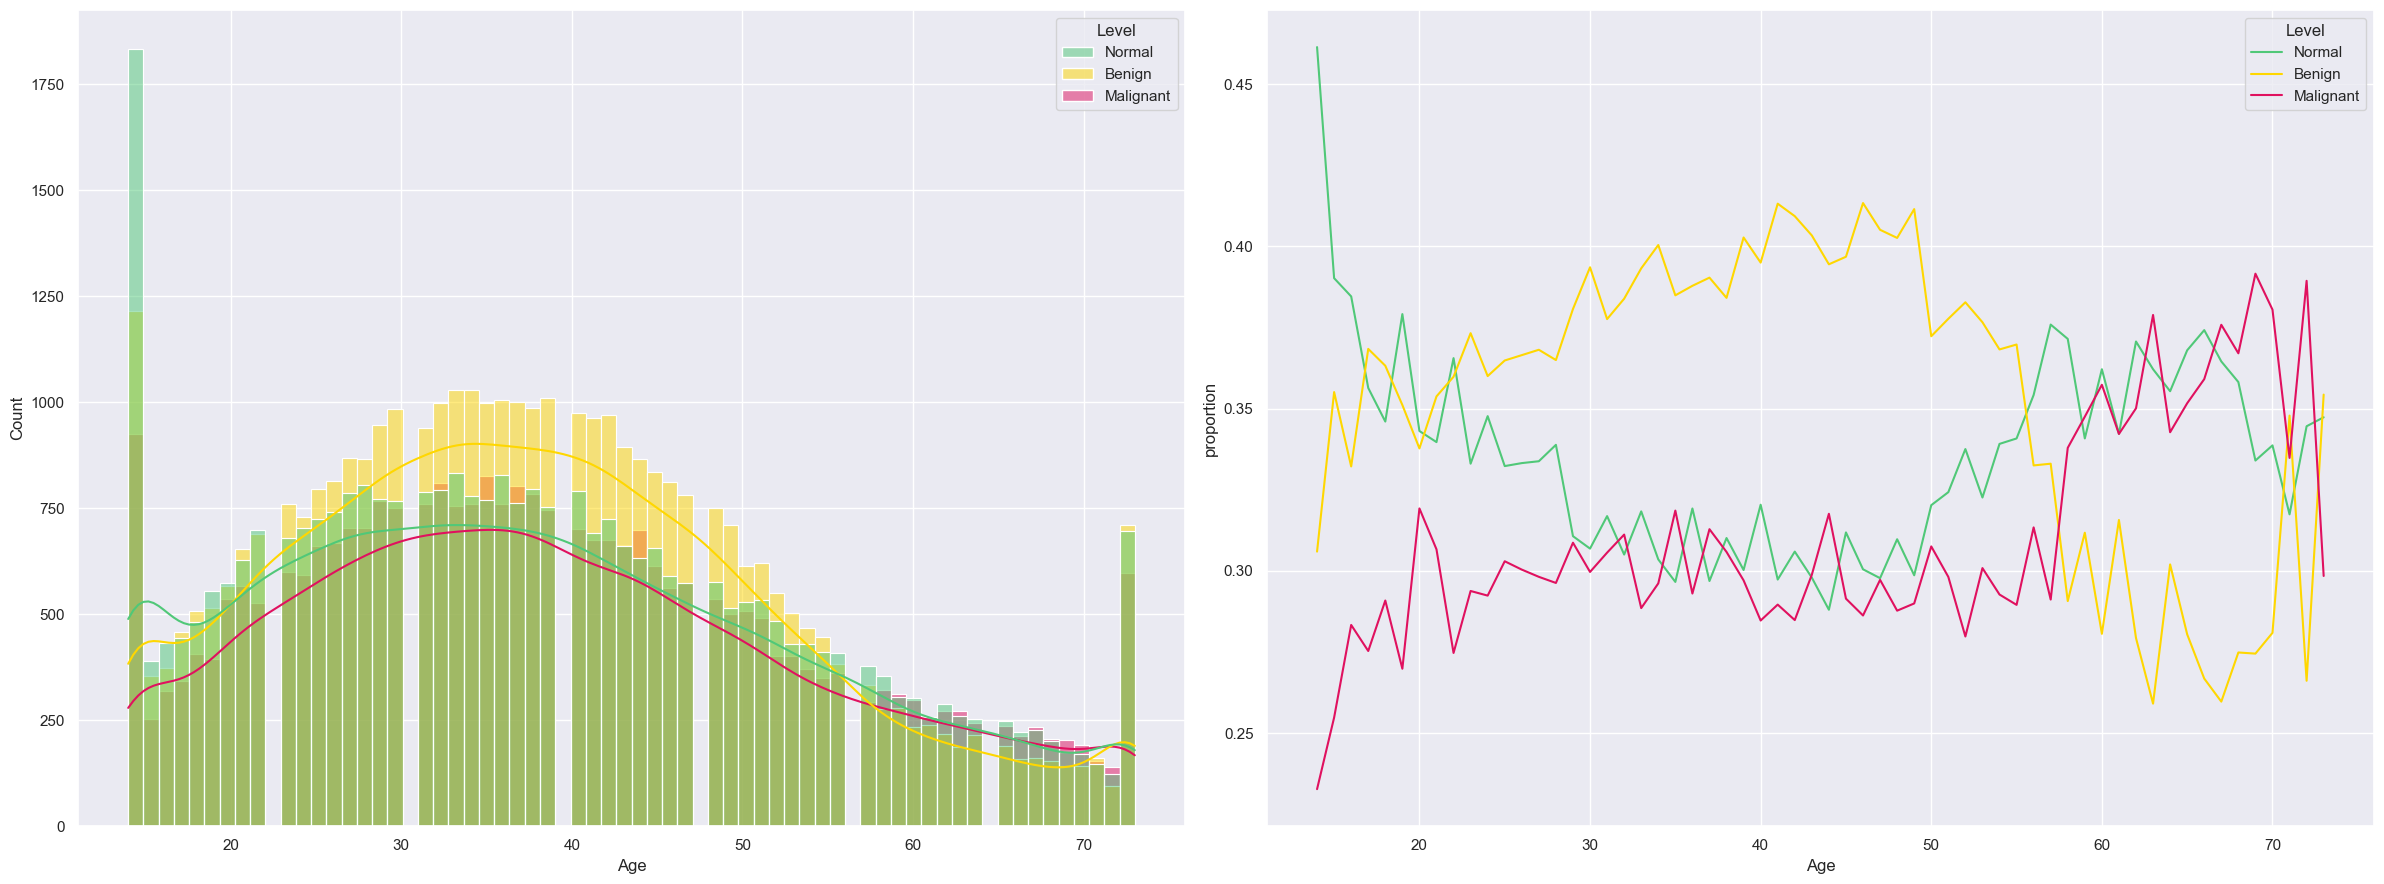

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(24, 9))
sns.histplot(
    data,
    x='Age',
    hue='Level', hue_order=level_order,
    kde=True,
    palette=level_palette,
    ax=axs[0]
)
sns.lineplot(
    data.groupby('Age')['Level'].value_counts(normalize=True).to_frame(),
    x='Age', y='proportion',
    hue='Level', hue_order=level_order,
    palette=level_palette,
    ax=axs[1]
)
fig.tight_layout()
plt.show()

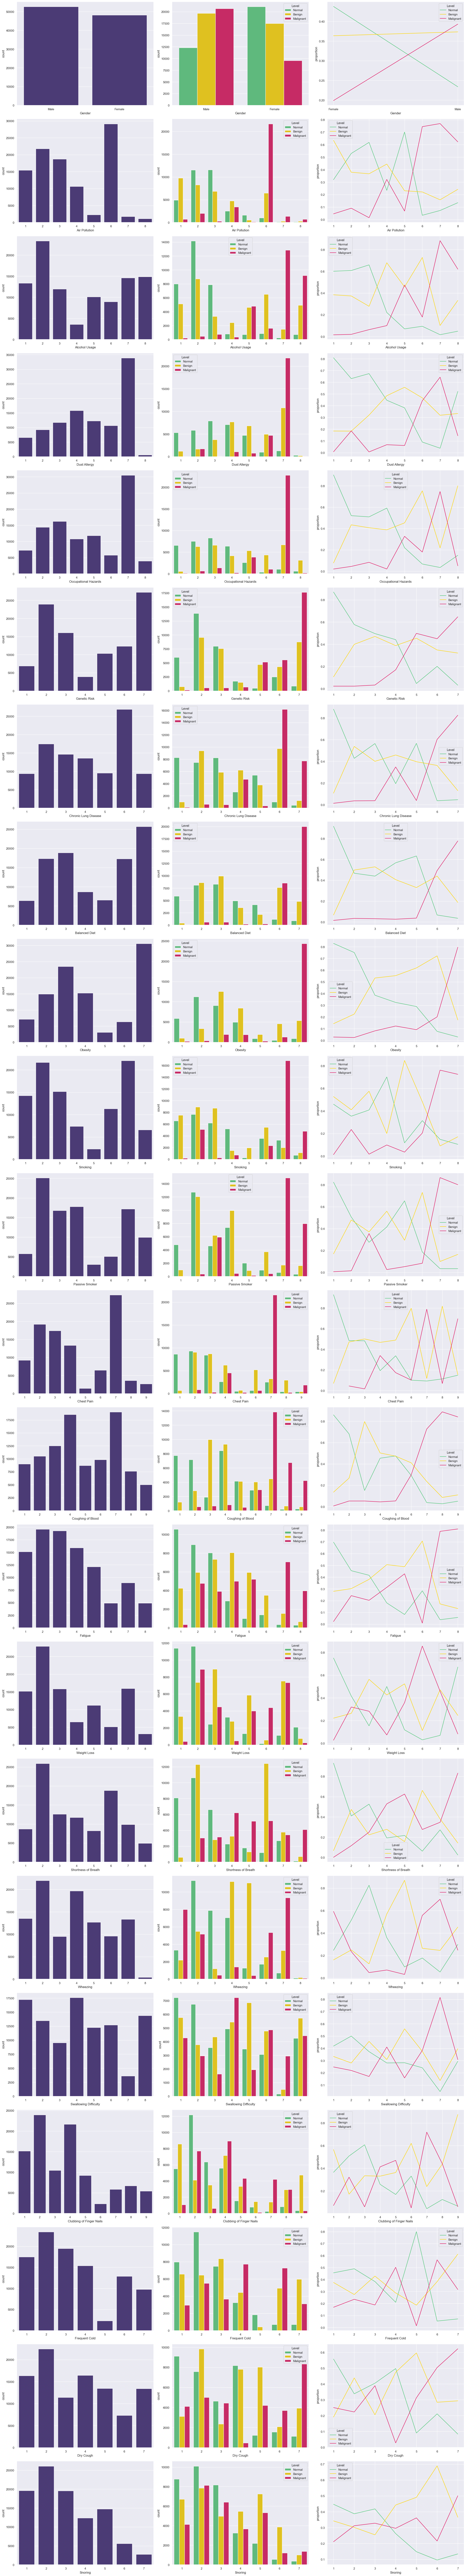

In [9]:
fig, axs = plt.subplots(22, 3, figsize=(24, 132))
for i, col in enumerate(data.columns[1:-1]):
    sns.countplot(data, x=col, ax=axs[i, 0])
    sns.countplot(
        data,
        x=col,
        hue='Level', hue_order=level_order,
        palette=level_palette,
        ax=axs[i, 1]
    )
    sns.lineplot(
        data.groupby(col)['Level'].value_counts(normalize=True).to_frame(),
        x=col, y='proportion',
        hue='Level', hue_order=level_order,
        palette=level_palette,
        ax=axs[i, 2]
    )
fig.tight_layout()
plt.show()

In [10]:
encoded_data = data.copy()
encoded_data['Gender'] = encoded_data['Gender'].map({'Male': 0, 'Female': 1})
encoded_data['Level'] = encoded_data['Level'].map({'Normal': 0, 'Benign': 1, 'Malignant': 2})

<Axes: >

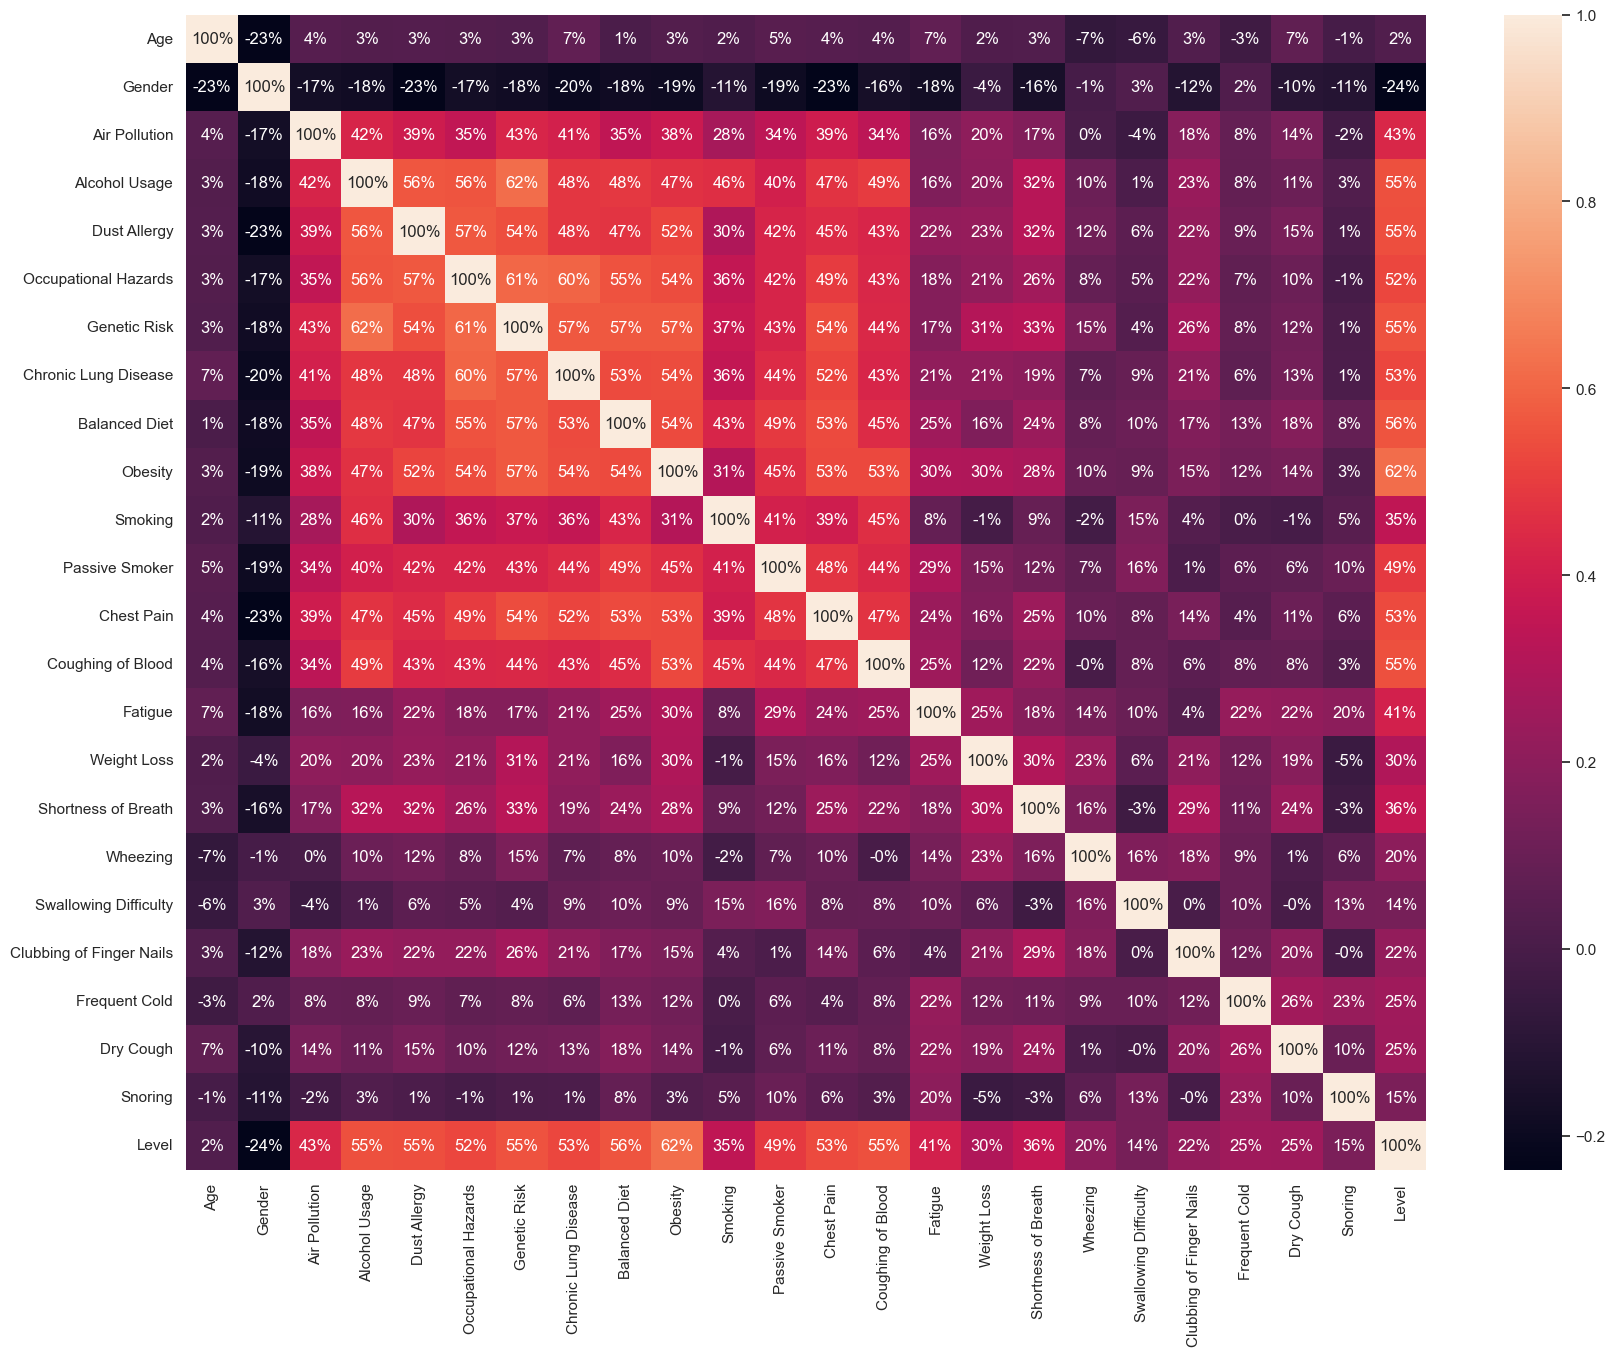

In [11]:
plt.figure(figsize=(20, 15))
sns.heatmap(encoded_data.corr('kendall'), annot=True, fmt='.0%')

In [12]:
data.to_csv('../data/cancer_data.csv', index=False)